# Rethinking the population pyramid

This notebook provides the methodology and code used in the blog post, [Rethinking the population pyramid](http://www.randalolson.com/2015/07/14/rethinking-the-population-pyramid/).

### Notebook by [Randal S. Olson](http://www.randalolson.com/)

Please see the [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is widely useable and shareable as possible.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

age_gender_data = pd.read_csv('applestore05.csv')
age_gender_data.head(30)


Bad key "axes.color_cycle" on line 17 in
https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,NAME,COUNT,Favorite,hate
0,Book,53,47,6
1,Business,6,4,2
2,Catalogs,6,5,1
3,Education,71,66,5
4,Entertainment,78,64,14
5,Finance,36,33,3
6,Food,13,11,2
7,Games,612,462,150
8,Health,33,21,12
9,Lifestyle,35,31,4


#Problems with the population pyramid

###1) Violates the [standard expectation](http://mathbench.umd.edu/modules/visualization_graph/page02.htm) of having the causal variable on the x-axis.

''

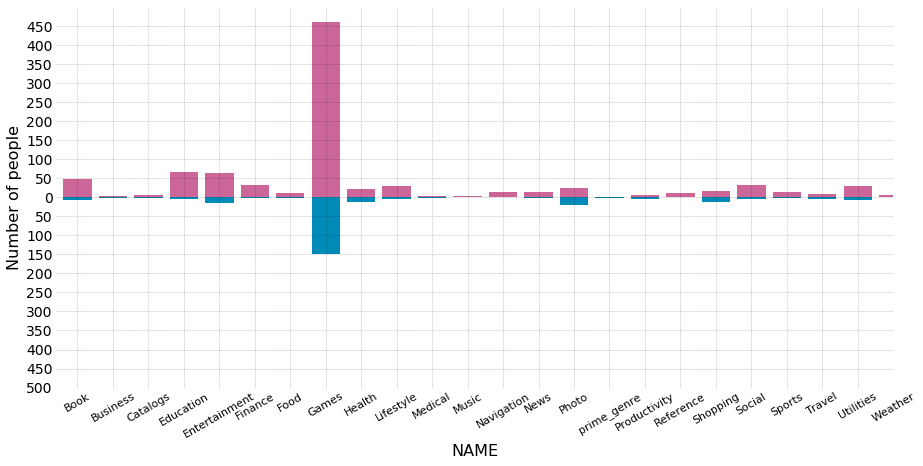

In [17]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i, i], [row['Favorite'], -row['hate']],
            color=['#CC6699', '#008AB8'], width=0.8, align='center', edgecolor='none')

plt.xlim(-0.6, 20.6)
plt.ylim(-500, 500)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 24), age_gender_data['NAME'], fontsize=11,rotation=30)
plt.yticks(np.arange(-500,500,50),
           ['{}'.format(int(abs(x))) if x != 0 else 0 for x in np.arange(-500,500,50)])
plt.xlabel('NAME')
plt.ylabel('Number of people')

plt.savefig('pop_pyramid_rotated.pdf')
;

###2) Doesn't allow direct comparisons between the two categories.

''

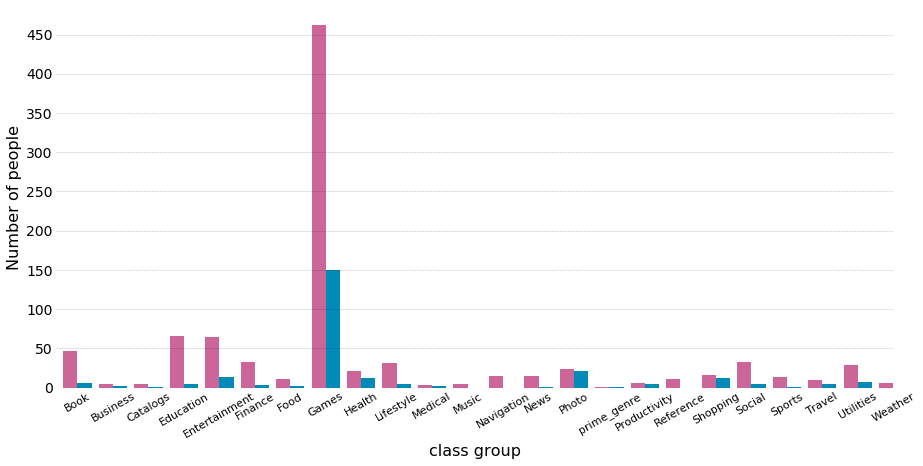

In [22]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in age_gender_data.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Favorite'], row['hate']],
            color=['#CC6699', '#008AB8'], width=0.4, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 24), age_gender_data['NAME'], fontsize=11,rotation=30)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 500, 50),
           ['{}'.format(int(x)) if x > 0 else 0 for x in np.arange(0, 500, 50)])
plt.xlabel('class group')
plt.ylabel('Number of people')

plt.savefig('pop_pyramid_grouped.pdf')
;

###3) Relative trends between the categories can be masked by displaying absolute values.

''

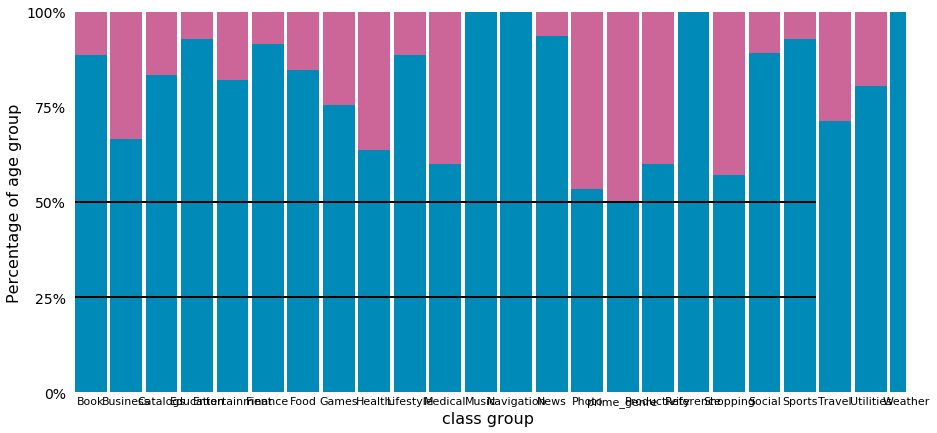

In [24]:
age_gender_data['Favorite'] = age_gender_data['Favorite'] / age_gender_data['COUNT']
age_gender_data['hate'] = age_gender_data['hate'] / age_gender_data['COUNT']

plt.figure(figsize=(15, 7))

for (i, row) in age_gender_data.iterrows():
    plt.bar([i], [row['Favorite']],
            color=['#008AB8'], width=0.9, align='center', edgecolor='none')
    plt.bar([i], [row['hate']], bottom=[row['Favorite']],
            color=['#CC6699'], width=0.9, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(0, 1)
plt.xticks(range(0, 24), age_gender_data['NAME'], fontsize=11)
plt.grid(False)
plt.yticks(np.arange(0, 1.01, 0.25),
           ['{}%'.format(int(x * 100)) for x in np.arange(0, 1.01, 0.25)])
plt.xlabel('class group')
plt.ylabel('Percentage of age group')

plt.plot([-0.425, 20.425], [0.5, 0.5], lw=2, color='black')
plt.plot([-0.425, 20.425], [0.25, 0.25], lw=2, color='black')

plt.savefig('pop_pyramid_stacked.pdf')
;